<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing
 
_Authors: Kiefer Katovich (San Francisco), Joseph Nelson (Washington, D.C.)_
 
---


### Learning Objectives

By the end of the lesson, you will be able to..

- Explain some of the challenges that make natural language processing difficult.
- Perform common text preprocessing techniques.
- Perform text classification.

<a id='textblob_install'></a>

### Install TextBlob

The TextBlob Python library provides a simplified interface for exploring common NLP tasks including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

To proceed with the lesson, first install TextBlob, as explained below. We tend to prefer Anaconda-based installations, since they tend to be tested with our other Anaconda packages.

**To install textblob run:**

> `conda install -c conda-forge textblob`

**If that command doesn't work, try these:**

> `pip install textblob`

> `python -m textblob.download_corpora lite`

<a id='intro'></a>

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

## Introduction

### What Is Natural Language Processing (NLP)?

Using computers to process (analyze, understand, generate) natural human languages.

### Why use NLP?

An enormous amount of information is stored as text. Computers can process this information much faster than humans.

### What Are Some of the Higher-Level Task Areas?

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Vectorizing:** Turning documents into vectors of numbers for use in machine learning
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

### NLP terms

- **corpus** (plural **corpora**): a collection of documents (derived from the Latin word for "body")
- **document**: any item in a corpus (e.g. email, book chapter, tweet, article, or text message).

<a id='yelp_rev'></a>

## Reading in the Yelp Reviews

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import scipy as sp

from nltk.stem.snowball import SnowballStemmer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob, Word

%matplotlib inline

In [2]:
# Read yelp.csv into a DataFrame.
path = Path('.', 'data', 'yelp.csv')
yelp = pd.read_csv(path)

In [8]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews.

yelp_best_worst = yelp.loc[(yelp.loc[:,'stars'] ==5) | (yelp.loc[:, 'stars'] == 1), :]

In [9]:
yelp_best_worst

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0


In [10]:
#predict the star rating from text
# Define X and y.

X = yelp_best_worst.loc[:, 'text']
y = yelp_best_worst.loc[:, 'stars']

In [12]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

<a id='text_class'></a>


# Introduction: Text Classification

**Text classification is the task of predicting which category or topic a text sample is from.**

E.g.:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?


**Turning text into feature vectors**

The only difference between this task and the kinds of classification tasks we have been considering is that our inputs consist of text rather than numeric features.

If we can find a way to represent text using a set of numeric features, then we can use standard machine learning classifiers for text classification.

We will start out with a **bag-of-words representation:**

- Preprocess the text, e.g. to remove punctuation and convert uppercase letters to lowercase.
- Create a vocabulary, e.g. every word in the corpus.
- Make each word in the vocabulary a feature.
- Represent each document with a vector that indicates how many times each word in the vocabulary appears in that document.

**Notes on bag-of-words:**

- Vocabulary will often contain tens of thousands of words or more.
- Most features will have a value of zero for most documents, resulting in a sparse matrix of features.
- This approach is called "bag-of-words" because it loses the document's structure — as if the words are all jumbled up in a bag.
- Rather than counting occurrences of each word, you might just record a 1 or 0 to indicate whether it is present or divide by the length of the document to indicate the word's frequency.

## Demo: Text Processing in scikit-learn

<a id='count_vec'></a>
### Creating Features Using CountVectorizer

- **What:** Converts each document into a set of words and their counts.
- **Why:** To use a machine learning model, we must convert unstructured text into numeric features.

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Model
![DTM](./images/DTM.png)

In [14]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
from sklearn.feature_extraction.text import CountVectorizer



In [17]:
#dtm = document term matrix

vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [22]:
# Transformed feature matrices are stored as sparse matrices for efficiency.

# A sparse representation stores the vaues and locations of non-zero elements,
# rather than storing a number for every element, which saves space when
# most elements are zero.

X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [21]:
# View as a dense matrix, it's a numpy matrix, not a dataframe
#each row is a document, each col is a word
#without toDense, this is giving a SparseMatrix
# it's inefficient if every col is 0
# more efficient is to keep track of a list of locations that are not 0's


X_train_dtm.todense().shape

(3064, 16825)

In [23]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).

X_train_dtm.shape

(3064, 16825)

In [27]:
X_train_dtm.sum(axis=0)

matrix([[65,  9,  1, ...,  1,  1,  1]], dtype=int64)

**Exercise.**

- 3064 of what?

number of yelp reviews that have either 5 or 1 stars

- 16825 of what?

Number of words in the vocabulary of the corpus

- How would you interpret the output of `X_train_dtm.sum(axis=1)`?

the total word count for each document

- How would you interpret the output of `X_train_dtm.sum(axis=0)`?

the total of each word in the corpus

In [28]:
# Last 50 features
vect.get_feature_names()[-50:]

['yyyyy',
 'z11',
 'za',
 'zabba',
 'zach',
 'zam',
 'zanella',
 'zankou',
 'zappos',
 'zatsiki',
 'zen',
 'zero',
 'zest',
 'zexperience',
 'zha',
 'zhou',
 'zia',
 'zihuatenejo',
 'zilch',
 'zin',
 'zinburger',
 'zinburgergeist',
 'zinc',
 'zinfandel',
 'zing',
 'zip',
 'zipcar',
 'zipper',
 'zippers',
 'zipps',
 'ziti',
 'zoe',
 'zombi',
 'zombies',
 'zone',
 'zones',
 'zoning',
 'zoo',
 'zoyo',
 'zucca',
 'zucchini',
 'zuchinni',
 'zumba',
 'zupa',
 'zuzu',
 'zwiebel',
 'zzed',
 'éclairs',
 'école',
 'ém']

In [29]:
# Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
#   'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
vect.vocabulary_

{'filly': 5773,
 'only': 10362,
 'reviews': 12465,
 'nine': 10069,
 'now': 10180,
 'wow': 16612,
 'do': 4631,
 'miss': 9578,
 'this': 15093,
 'place': 11186,
 '24hrs': 136,
 'drive': 4809,
 'thru': 15136,
 'or': 10413,
 'walk': 16195,
 'up': 15834,
 'ridiculously': 12514,
 'cheap': 2789,
 'tasty': 14838,
 'of': 10286,
 'course': 3679,
 'the': 15032,
 'arizona': 1018,
 'burritos': 2286,
 'are': 1003,
 'good': 6571,
 'everything': 5342,
 'is': 7956,
 'used': 15885,
 'to': 15228,
 'love': 8899,
 'one': 10354,
 'combos': 3233,
 'you': 16727,
 'get': 6433,
 'beef': 1564,
 'burrito': 2285,
 'taco': 14720,
 'rice': 12489,
 'and': 805,
 'beans': 1528,
 'for': 6028,
 'under': 15683,
 'color': 3213,
 'me': 9301,
 'silly': 13462,
 'call': 2398,
 'sally': 12808,
 'they': 15067,
 'have': 7023,
 'bomb': 1902,
 'horchata': 7345,
 'too': 15281,
 'really': 12038,
 'fresh': 6154,
 'flautas': 5882,
 'rolled': 12622,
 'tacos': 14721,
 'breakfast': 2069,
 'damn': 3999,
 'here': 7149,
 'whether': 16394,
 'd

In [30]:
# Show vectorizer options.
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

By default, CountVectorizer converts all text to lowercase before generating features. Otherwise, "Pizza" at the start of a sentence becomes a different feature from "pizza" in the middle of a sentence.

On the other hand, you would want different features corresponding to "Apple" the company and "apple" the fruit, so this step does discard some information.

In [ ]:
# Don't convert to lowercase.


**Exercise.** What is the vocabulary size for CountVectorizer on this dataset with `lowercase=False`? Is this size greater or smaller than the size with `lowercase=True`? Why?

In [31]:
# Create document-term matrices using default options for CountVectorizer.
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [32]:
# Use Naive Bayes to predict the star rating.
# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [33]:
# Calculate accuracy.
metrics.accuracy_score(y_test, y_pred_class)

0.91878669275929548

In [34]:
# Check label balance
# Check label balance
# with accuracy, you have to check the balance between the classes
# 838/184

y_test.value_counts()

5    838
1    184
Name: stars, dtype: int64

In [36]:
#predict 5 everytime, and record 1 if right, 0 if wrong
#take the mean, gives accuracy of 82%, accuracy returns better 92%, so there's an improvement


print('Accuracy guessing 5 every time:', np.where(y_test==5, 1, 0).mean())

Accuracy guessing 5 every time: 0.819960861057


In [38]:
#alternatively
(y_test == 5).mean()

0.81996086105675148

Our model predicted ~92% accuracy, which is an improvement over this baseline 82% accuracy (assuming our model always predicts 5 stars).

Let's look more into how the vectorizer works.

In [39]:
# Define a function that accepts a vectorizer and calculates the accuracy.

def tokenize_test(vect):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    print('Number of features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [42]:
vect = CountVectorizer()
tokenize_test(vect)

Number of features:  16825
Accuracy:  0.918786692759


In [44]:
# min_df=2 says to ignore words that occur less than twice ('df' means "document frequency").
# if word occurs in less than 2 documents, ignore it
# Cut the # of features for 16825 down to 8783
# min_df = minimum document frequency
vect = CountVectorizer(min_df=2)
tokenize_test(vect)

Number of features:  8783
Accuracy:  0.924657534247


In [47]:
#max features defines the max number words in our corpus
#take the 5000 most common words with a min freq of 2

vect = CountVectorizer(min_df=2, max_features=5000)
tokenize_test(vect)

Number of features:  5000
Accuracy:  0.918786692759


In [43]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : string {'filename', 'file', 'content'}
 |      If 'filename', the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw content to analyze.
 |  
 |      If 'file', the sequence items must have a 'read' method (file-like
 |      object) that is called to fetc

Let's take a look next at other ways of preprocessing text!

<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [52]:
# Include 1-grams and 2-grams.
# we added more noise, model overfit
# accuracy went down

vect = CountVectorizer(ngram_range=(1,2), max_features=16000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
tokenize_test(vect)

Number of features:  16000
Accuracy:  0.916829745597


As $n$ gets larger, the number of *unique* n-grams increases greatly, adding pure noise to the data set.

In [53]:
# Last 50 features
vect.get_feature_names()[-50:]

['your face',
 'your favorite',
 'your first',
 'your food',
 'your friends',
 'your guests',
 'your hair',
 'your hand',
 'your hands',
 'your job',
 'your kids',
 'your life',
 'your looking',
 'your meal',
 'your mind',
 'your money',
 'your mouth',
 'your name',
 'your order',
 'your own',
 'your place',
 'your questions',
 'your restaurant',
 'your server',
 'your table',
 'your taste',
 'your time',
 'your tongue',
 'your typical',
 'your way',
 'yourself',
 'yourself and',
 'yourself favor',
 'yourself with',
 'yr',
 'yr old',
 'yuck',
 'yum',
 'yum yum',
 'yummm',
 'yummy',
 'yummy and',
 'yup',
 'zach',
 'zen',
 'zero',
 'zero stars',
 'zinburger',
 'zoo',
 'zucchini']

<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

In [54]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=16000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [56]:
# CountVectorizer stop words for English
vect = CountVectorizer(stop_words='english')

#show the stop words
vect.get_stop_words()


frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [58]:
# removing stop words can only help
# in this case only sort of improved the model

tokenize_test(vect)

Number of features:  16528
Accuracy:  0.915851272016


<a id='cvec_opt'></a>
### Other CountVectorizer Options

- `max_features`: int or None, default=None
- If not None, build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus. This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [62]:
# Remove English stop words and only keep 100 features.
#86% but with less features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Number of features:  100
Accuracy:  0.869863013699


In [64]:
# All 100 features
vect.get_feature_names()

['amazing',
 'area',
 'atmosphere',
 'awesome',
 'bad',
 'bar',
 'best',
 'better',
 'big',
 'came',
 'cheese',
 'chicken',
 'clean',
 'coffee',
 'come',
 'day',
 'definitely',
 'delicious',
 'did',
 'didn',
 'dinner',
 'don',
 'eat',
 'excellent',
 'experience',
 'favorite',
 'feel',
 'food',
 'free',
 'fresh',
 'friendly',
 'friends',
 'going',
 'good',
 'got',
 'great',
 'happy',
 'home',
 'hot',
 'hour',
 'just',
 'know',
 'like',
 'little',
 'll',
 'location',
 'long',
 'looking',
 'lot',
 'love',
 'lunch',
 'make',
 'meal',
 'menu',
 'minutes',
 'need',
 'new',
 'nice',
 'night',
 'order',
 'ordered',
 'people',
 'perfect',
 'phoenix',
 'pizza',
 'place',
 'pretty',
 'prices',
 'really',
 'recommend',
 'restaurant',
 'right',
 'said',
 'salad',
 'sandwich',
 'sauce',
 'say',
 'service',
 'staff',
 'store',
 'sure',
 'table',
 'thing',
 'things',
 'think',
 'time',
 'times',
 'took',
 'town',
 'tried',
 'try',
 've',
 'wait',
 'want',
 'way',
 'went',
 'wine',
 'work',
 'worth',
 

Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In this case, there is roughly a 1.6% increase in accuracy when we double the n-gram size and increase our max features by 1,000-fold. Note that if we restrict it to only unigrams, then the accuracy increases even more! So, bigrams were very likely adding more noise than signal. 

In the end, by only using 16,000 unigram features we came away with a much smaller, simpler, and easier-to-think-about model which also resulted in higher accuracy.

In [70]:
# Include 1-grams and 2-grams, and limit the number of features.
vect = CountVectorizer(ngram_range=(1,2), max_features=10000)
tokenize_test(vect)

Number of features:  10000
Accuracy:  0.912915851272


In [74]:
vect = CountVectorizer(ngram_range=(1,1), max_features=10000)
tokenize_test(vect)

Number of features:  10000
Accuracy:  0.920743639922


In [73]:
# Include 1-grams and 2-grams, and only include terms that appear at least two times.
vect = CountVectorizer(ngram_range=(1,2), min_df=2)
tokenize_test(vect)

Number of features:  43957
Accuracy:  0.932485322896


**Exercise.** How does each of the following changes to the feature representation used affect the bias and variance of a resulting model?

- Increasing min_df

makes it more general
increase bias, decrease variance

- Using both unigrams and bigrams instead of just unigrams.

decrease bias, increase variance

- Removing stop words

increase bias, decrease variance

- Decreasing `max_features`

Increase bias, decrease variance

<a id='textblob'></a>
## Introduction to TextBlob

You should already have downloaded TextBlob, a Python library used to explore common NLP tasks. If you haven’t, please return to [this step](#textblob_install) for instructions on how to do so. We’ll be using this to organize our corpus for analysis.

As mentioned earlier, you can read more on the [TextBlob website](https://textblob.readthedocs.io/en/dev/).

In [77]:
# Print the first review.
yelp_best_worst.loc[0, 'text']

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [87]:
pip install textblob
python -m textblob.download_corpora lite

SyntaxError: invalid syntax (<ipython-input-87-c11ec576b024>, line 1)

In [86]:
# Save it as a TextBlob object.
# Save it as a TextBlob object.
from textblob import TextBlob


review = TextBlob(yelp_best_worst.loc[0, 'text'])

SyntaxError: invalid syntax (<ipython-input-86-30f0cfad557e>, line 4)

In [85]:
# List the words.
review.words


**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/naidaire/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [88]:
# List the sentences.
review.sentences


**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/naidaire/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
# Some string methods are available.
review.lower()

<a id='stem'></a>
## Stemming and Lemmatization

Stemming is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed".

- **What:** Reduce a word to its base/stem/root form.
- **Why:** This intelligently reduces the number of features by grouping together (hopefully) related words.
- **Notes:**
    - Stemming uses a simple and fast rule-based approach.
    - Stemmed words are usually not shown to users (used for analysis/indexing).
    - Some search engines treat words with the same stem as synonyms.

In [90]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')


In [94]:
# Stem each word.
# lops off end of words
[stemmer.stem(word) for word in review.words]

['my',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast',
 'and',
 'it',
 'was',
 'excel',
 'the',
 'weather',
 'was',
 'perfect',
 'which',
 'made',
 'sit',
 'outsid',
 'overlook',
 'their',
 'ground',
 'an',
 'absolut',
 'pleasur',
 'our',
 'waitress',
 'was',
 'excel',
 'and',
 'our',
 'food',
 'arriv',
 'quick',
 'on',
 'the',
 'semi-busi',
 'saturday',
 'morn',
 'it',
 'look',
 'like',
 'the',
 'place',
 'fill',
 'up',
 'pretti',
 'quick',
 'so',
 'the',
 'earlier',
 'you',
 'get',
 'here',
 'the',
 'better',
 'do',
 'yourself',
 'a',
 'favor',
 'and',
 'get',
 'their',
 'bloodi',
 'mari',
 'it',
 'was',
 'phenomen',
 'and',
 'simpli',
 'the',
 'best',
 'i',
 've',
 'ever',
 'had',
 'i',
 "'m",
 'pretti',
 'sure',
 'they',
 'onli',
 'use',
 'ingredi',
 'from',
 'their',
 'garden',
 'and',
 'blend',
 'them',
 'fresh',
 'when',
 'you',
 'order',
 'it',
 'it',
 'was',
 'amaz',
 'while',
 'everyth',
 'on',
 'the',
 'menu',
 'look',
 'excel',
 'i',
 'had

Some examples you can see are "excellent" stemmed to "excel" and "amazing" stemmed to "amaz".

Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word.  

This is useful for words that do not share an obvious root such as "better" and "best".

- **What:** Lemmatization derives the canonical form ("lemma") of a word.
- **Why:** It can be better than stemming.
- **Notes:** Uses a dictionary-based approach (slower than stemming).

In [96]:
# Assume every word is a noun.
# notice Was is Wa
# you can lemmitize bc this is a textblob
print([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

Some examples you can see are "filled" lemmatized to "fill" and "was" lemmatized to "wa".


In [100]:
# Assume every word is a verb.
print([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

Some examples you can see are "was" lemmatized to "be" and "arrived" lemmatized to "arrive".

**More Lemmatization and Stemming Examples**

|Word|Lemmatization|Stemming|
|-----|-------------|---------|
|shouted|shout|shout|
|best | good|best|
|better | good|better|
|good | good|good|
|hidden | hide|hidden|
|computing |compute| comput|
|computed |compute| comput|
|wipes |wipe| wip|
|wiped |wipe| wip|
|wiping |wipe| wip|

In [105]:
# Define a function that accepts text and returns a list of lemmas.

def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return (word.lemmatize(pos='v') for word in words)

In [108]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
tokenize_test(vect)

#use help() to understand the analyzer

Number of features:  15352
Accuracy:  0.917808219178


In [107]:
# Last 50 features
vect.get_feature_names()[-50:]

['yuuuuuuum',
 'yuyuyummy',
 'yuzu',
 'z',
 'z-grill',
 'z11',
 'zach',
 'zam',
 'zanella',
 'zankou',
 'zappos',
 'zatsiki',
 'zen',
 'zen-like',
 'zero',
 'zero-star',
 'zest',
 'zexperience',
 'zha',
 'zhou',
 'zia',
 'zilch',
 'zin',
 'zinburger',
 'zinburgergeist',
 'zinc',
 'zinfandel',
 'zing',
 'zip',
 'zipcar',
 'zipper',
 'zipps',
 'ziti',
 'zoe',
 'zombi',
 'zombies',
 'zone',
 'zoo',
 'zoyo',
 'zucca',
 'zucchini',
 'zuchinni',
 'zumba',
 'zupa',
 'zuzu',
 'zwiebel-kräuter',
 'zzed',
 'éclairs',
 'école',
 'ém']

Keep in mind that you should constantly be thinking about the result of each preprocessing step instead of blindly trying them without thinking. Does each type of preprocessing "makes sense" with the input data you are using? Is it likely to keep intact the signal and remove noise?

<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [109]:
# Example documents
simple_train = ['call you tonight', 'call me a cab', 'please call me... PLEASE!']

In [128]:
# Term frequency
# for each term, how many tiems does it occur in each document
#just the CountVectorizer

vect = CountVectorizer()
vect.fit(simple_train)
tf = pd.DataFrame(vect.transform(simple_train).todense(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [129]:
# Document frequency
# how many times does each term occur across the whole corpus (or all docs)
#binary just gives 1, 0
vect = CountVectorizer(binary=True)
vect.fit(simple_train)
df = pd.DataFrame(vect.transform(simple_train).todense().sum(axis=0), columns=vect.get_feature_names())
df

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [134]:
# Term frequency–inverse document frequency (simple version)
# measures how important is this word compared to how frequent it is normally

pd.DataFrame(tf.values/df.values, columns=vect.get_feature_names())



# call is not so useful to make distinctions, so gets a lower TI-IDF score

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1, while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [136]:
# TfidfVectorizer -- uses a slightly different implementation of the same basic idea

vect = TfidfVectorizer()
vect.fit(simple_train)
pd.DataFrame(vect.transform(simple_train).todense(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


[Details of the sklearn implementation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

tl;dr the idf term has a log and some smoothing, and each row is normalized to have unit length.

<a id='yelp_tfidf'></a>
## Using TF–IDF to Summarize a Yelp Review

In [137]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')


In [139]:
# Fit transform Yelp data.
# create summary of our review


vect.fit(yelp.loc[:, 'text'])
dtm = vect.transform(yelp.loc[:, 'text'])
features = vect.get_feature_names()

In [140]:
dtm.shape

(10000, 28880)

In [141]:
def summarize():
    
    # Choose a random review that is at least 300 characters.
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words.
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review.
    print(('\n' + review_text))

In [143]:
summarize()

TOP SCORING WORDS:
malls
cluster
tolerable
desire
speed

RANDOM WORDS:
avoid
hate
maybe
speed
desire

As far as malls go - and I hate malls - this one is tolerable. Just speed past the food court to avoid a cluster you-know-what. 

If you like upscale, this is your place. Me, I typically hit two to three stores and leave. But maybe that's just my shopping style.

If you have the cash to blow, the time to spend and the desire to shop, then this is your mall.


<a id='sentiment'></a>
## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

In [145]:
#print first review
print(review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [147]:
# Polarity ranges from -1 (most negative) to 1 (most positive).

review.sentiment.polarity

0.40246913580246907

In [149]:
# Define a function that accepts text and returns the polarity.

def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [150]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
yelp.loc[:, 'sentiment'] = yelp.loc[:, 'text'].apply(detect_sentiment)

/Users/naidaire/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


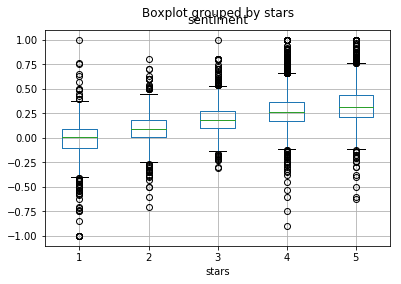

In [153]:
# Box plot of sentiment grouped by stars
# you can see that there is a shift in sentiment
yelp.boxplot(column='sentiment', by='stars');

In [154]:
# Reviews with most positive sentiment
yelp.loc[yelp.loc[:, 'sentiment'] == 1, 'text'].head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [155]:
# Reviews with most negative sentiment
yelp.loc[yelp.loc[:, 'sentiment'] == -1, 'text'].head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [158]:
# Negative sentiment in a 5-star review
yelp.loc[(yelp.loc[:, 'stars'] == 5) & (yelp.loc[:, 'sentiment'] < -.3), 'text'].head().values

array([ 'RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!',
       "Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.",
       'Unfortunately Out of Business.',
       "Cashew brittle, almond brittle, bacon brittle!  Go now, before it's too late!",
       'Brown bag chicken sammich, mac n cheese, fried okra, and the bourbon drink.  Nuff said.'], dtype=object)

In [161]:
# Positive sentiment in a 1-star review
# notice that sarcasm is hard for the algo to handle

yelp.loc[(yelp.loc[:, 'stars'] == 1) & (yelp.loc[:, 'sentiment'] > .7), 'text'].head().values

array([ "If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.",
       "My mother always told me, if I didn't have anything nice to say, say nothing!",
       "The owner has changed hands & this place isn't what it used to be.  If you want up to date paper & quality product...go to Scrap Happy OR Crop Girls!"], dtype=object)

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [ ]:
# Create a DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst.loc[:, feature_cols]
y = yelp_best_worst.loc[:, 'stars']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

In [ ]:
# Shape of other four feature columns
X_train.drop('text', axis=1).shape

In [ ]:
# Cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

In [ ]:
# Combine sparse matrices.
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

In [ ]:
# Repeat for testing set.
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

In [ ]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

In [ ]:
# Use logistic regression with all features.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

<a id='more_textblob'></a>
## Bonus: Fun TextBlob Features

In [ ]:
# Spelling correction
TextBlob('15 minuets late').correct()

In [ ]:
# Spellcheck
Word('parot').spellcheck()

In [ ]:
# Definitions
Word('bank').define('v')

In [ ]:
# Language identification
TextBlob('Hola amigos').detect_language()

<a id="bayes"></a>

## Appendix: Intro to Naive Bayes and Text Classification

Naive Bayes is a very popular classifier because it has minimal storage requirements, is fast, can be tuned easily with more data, and has found very useful applications in text classificaton. For example, Paul Graham originally proposed using Naive Bayes to detect spam in his [Plan for Spam](http://www.paulgraham.com/spam.html).

Earlier we experimented with text classification using a Naive Bayes model. What exactly are Naive Bayes classifiers? 

**What is Bayes?**  
Bayes, or Bayes' Theorem, is a way to update a probability distribution given some new data.

Below is the equation for Bayes.  

$$P(A \ | \ B) = \frac {P(B \ | \ A) \times P(A)} {P(B)}$$

- **$P(A \ | \ B)$** : Probability of `Event A` occurring given `Event B` has occurred.
- **$P(B \ | \ A)$** : Probability of `Event B` occurring given `Event A` has occurred.
- **$P(A)$** : Probability of `Event A` occurring.
- **$P(B)$** : Probability of `Event B` occurring.



## Applying Naive Bayes Classification to Spam Filtering

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam.** ("Ham" just means not spam. It can include emails that look like spam but that you opt into!)

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are conditionally independent, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

Note that each conditional probability in the numerator is easily calculated directly from the training data!

So, we can calculate all of the values in the numerator by examining a corpus of spam email:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We would repeat this process with a corpus of ham email:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the higher probability, and so we predict that the email is spam.


### Key Takeaways

- The "naive" assumption of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple.
- The normalization constant (the denominator) can be ignored since it's the same for all classes.
- The prior probability is much less relevant once you have a lot of features.

### Comparing Naive Bayes With Other Models

Advantages of Naive Bayes:

- Model training and prediction are very fast.
- It's somewhat interpretable.
- No tuning is required.
- Features don't need scaling.
- It's insensitive to irrelevant features (with enough observations).
- It performs better than logistic regression when the training set is very small.

Disadvantages of Naive Bayes:

- If "spam" is dependent on non-independent combinations of individual words, it may not work well.
- Predicted probabilities are not well calibrated.
- Correlated features can be problematic (due to the independence assumption).
- It can't handle negative features (with Multinomial Naive Bayes).
- It has a higher "asymptotic error" than logistic regression.

-----

<a id='conclusion'></a>
## Summary

- NLP techniques allow us to do machine learning with text.
- High-level NLP tasks include part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
- Common steps for preprocessing text include splitting into words ("tokenizing"), discarding punctuation, converting to lowercase, and stemming/lemmatizing.
- To apply machine learning to text, we need to convert documents into numeric vectors.
- Bag-of-words representations ignore word order, while ngram representations preserve it to some extent.
- TF-IDF is a powerful technique for turning the words in a document into a useful feature vector.

# Projects

Due Thurs.:

- Final Project Pt 4

# Questions?

# Exit Tickets

```
=========================================
@channel
Exit Ticket: https://goo.gl/forms/OUw4gyTiRKMOTI3t2        

#feedback
=========================================
```